<a href="https://colab.research.google.com/github/anand1994sp/MACHINE-LEARNING-PROJECTS/blob/main/Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# Pre-Processing
### 1) missing data
### 2) Encoding
### 3) Outlier
### 4) Feature Scaling 
### 5) Imbalance dataset - this is not required as it's applicable only for classification problem

In [ ]:
# part 1 - there is no missing data found
dataset.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [ ]:
# part 2 - Encoding - not required as variable is numerica 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


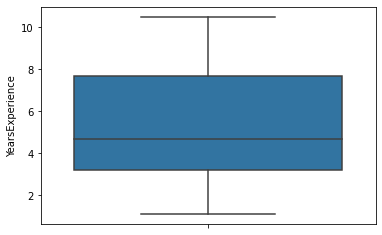

In [ ]:
# part 3 - outlier treatement (only check with Independent variable)
# No outlier found 
sns.boxplot(y = 'YearsExperience', data=dataset)
plt.show()

In [ ]:
# part 4 - feature scaling
# since,it's simple linear regression and we have only one independent variable. hence, no need to do feature scalling

#### Pre-processing part completed #####

In [ ]:
# Split the data into independent and dependent variable
# x = dataset['YearsExperience'].values # independent variable
# y = dataset['Salary'].values # dependent variable

In [ ]:
x1 = dataset.iloc[:,0:1].values
y1 = dataset.iloc[:,1].values

In [ ]:
x1

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [ ]:
y1

array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

In [ ]:
# split the data into training and test
# training dataset - model building
# test dataset - prediction 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1, y1, train_size=0.7, random_state=101)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(9, 1)
(21,)
(9,)


In [ ]:
print(len(y_train))
print(len(x_train))

21
21


# Build Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# Y = MX + C
# M = SLOPE
# C = Intercept
print("Co-efficient or Slope :", lin_model.coef_)
print("Intercept :", lin_model.intercept_)
print("Y = 9577.17174975*YearsExperience + 9577.17174975")

Co-efficient or Slope : [9577.17174975]
Intercept : 25975.814659541138
Y = 9577.17174975*YearsExperience + 9577.17174975


In [ ]:
# Predict the x_test data with linear_model

y_pred = lin_model.predict(x_test)

In [ ]:
y_pred

array([ 91100.58255782, 109297.20888234,  56622.76425873,  82481.12798305,
        40341.57228416, 117916.66345711, 116958.94628213,  74819.39058325,
       112170.36040726])

In [ ]:
# Evaluate your model
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9746363787521536


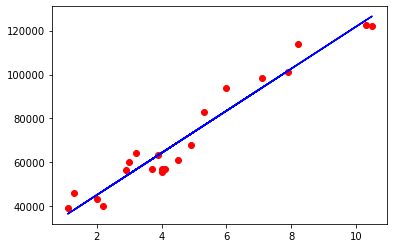

In [ ]:
# visualisation
plt.scatter(x_train, y_train, color ='red')
plt.plot(x_train, lin_model.predict(x_train), color='blue')

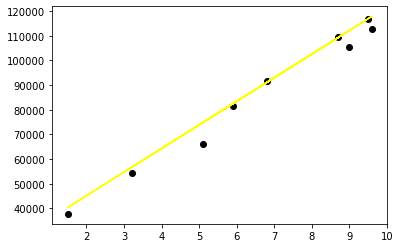

In [ ]:
plt.scatter(x_test, y_test, color ='black')
plt.plot(x_test, lin_model.predict(x_test), color='yellow')

In [ ]:
newdata = pd.read_excel('Predict_Salary_basis_exp.xlsx')
newdata

,YearsExperience
0,0.50
1,2.50
2,5.00
3,10.00
4,12.00
5,6.00
6,7.00
7,4.30
8,2.25
9,1.75


In [ ]:
pred_new_salary = lin_model.predict(newdata)

In [ ]:
pred_new_salary

array([ 30764.40053441,  49918.74403391,  73861.67340827, 121747.53215701,
       140901.8756565 ,  83438.84515802,  93016.01690777,  67157.65318345,
        47524.45109647,  42735.8652216 , 169633.39090574, 217519.24965447])

In [ ]:
new_salary = pd.concat([newdata,pd.DataFrame(pred_new_salary)], axis=1)

In [ ]:
new_salary.columns = ['YearsExperience','New Salary']

In [ ]:
new_salary

,YearsExperience,New Salary
0,0.50,30764.400534
1,2.50,49918.744034
2,5.00,73861.673408
3,10.00,121747.532157
4,12.00,140901.875657
5,6.00,83438.845158
6,7.00,93016.016908
7,4.30,67157.653183
8,2.25,47524.451096
9,1.75,42735.865222


In [ ]:
new_salary.to_csv("new salary.csv")